**Punto 1.1:**

In [ ]:
import numpy as np

def Espadas_tomadas(Espadas_actuales:int,Siguientes_cartas:int):


  A = 52 - Espadas_actuales

  B = 13 - Espadas_actuales

  Bar = np.zeros(A)

  Bar[:B] = 1

  Casos_exitosos = 0

  N = 100000

  for i in range(N):

    np.random.shuffle(Bar)

    if np.sum(Bar[:Siguientes_cartas]) == Siguientes_cartas:

      Casos_exitosos += 1

  return ("En el caso de tener actualmente " + str(Espadas_actuales) + " espadas, la probabilidad de que las proximas "  + str(Siguientes_cartas) +
   " cartas agarradas sean espadas es del " + str((Casos_exitosos / N)))



**a.)**

In [ ]:
Espadas_tomadas(2,3)

'En el caso de tener actualmente 2 espadas, la probabilidad de que las proximas 3 cartas agarradas sean espadas es del 0.00827'

**b.)**

In [ ]:
Espadas_tomadas(3,2)

'En el caso de tener actualmente 3 espadas, la probabilidad de que las proximas 2 cartas agarradas sean espadas es del 0.03816'

**c.)**

In [ ]:
Espadas_tomadas(4,1)

'En el caso de tener actualmente 4 espadas, la probabilidad de que las proximas 1 cartas agarradas sean espadas es del 0.18677'

**1.2.**

In [ ]:
import numpy as np

N = 1000000
Contagios_A = 0
Contagios_B = 0
poblacion = 1000000

V_Exposicion = int(poblacion * 0.6)
V_pob_Exposicion = np.zeros(poblacion)
V_pob_Exposicion[:V_Exposicion] = 1

V_Contagio = int(V_Exposicion * 0.2)
V_pob_Contagio = np.zeros(poblacion)
V_pob_Contagio[:V_Contagio] = 1


NV_Exposicion = int(poblacion * 0.6)
NV_pob_Exposicion = np.zeros(poblacion)
NV_pob_Exposicion[:NV_Exposicion] = 1

NV_Contagio = int(NV_Exposicion * 0.9)
NV_pob_Contagio = np.zeros(poblacion)
NV_pob_Contagio[:NV_Contagio] = 1


for i in range(N):
    A = np.random.choice(V_pob_Contagio)
    if A == 1:
        Contagios_A += 1

    B = np.random.choice(NV_pob_Contagio)
    if B == 1:
        Contagios_B += 1


prob_A = Contagios_A / N
prob_B = Contagios_B / N
rta = round(1 - (1 - prob_A) * (1 - prob_B),4)


print("P = " + str(rta))


P = 0.5959


**2.1.**

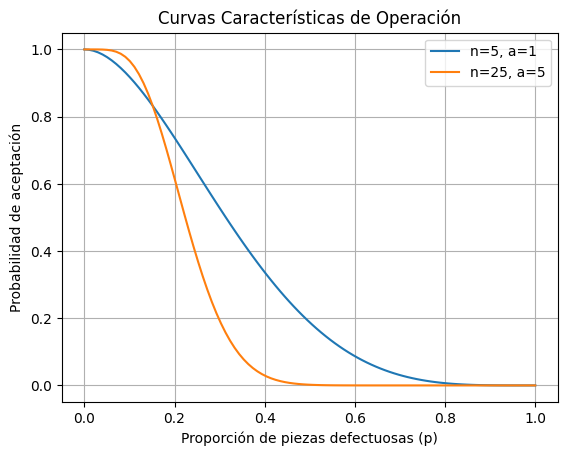

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

def piezas_defectuosas(p_max:float):

  alt_1 = (5, 1)
  alt_2 = (25, 5)

  p_v = np.linspace(0, p_max, 100)

  prob_acep_alt_1 = [binom.cdf(alt_1[1], alt_1[0], p) for p in p_v]
  prob_acep_alt_2 = [binom.cdf(alt_2[1], alt_2[0], p) for p in p_v]

  plt.plot(p_v, prob_acep_alt_1, label=f'n={alt_1[0]}, a={alt_1[1]}')
  plt.plot(p_v, prob_acep_alt_2, label=f'n={alt_2[0]}, a={alt_2[1]}')

  plt.title('Curvas Características de Operación')
  plt.xlabel('Proporción de piezas defectuosas (p)')
  plt.ylabel('Probabilidad de aceptación')
  plt.legend()
  plt.grid(True)
  plt.show()

piezas_defectuosas(1.0)

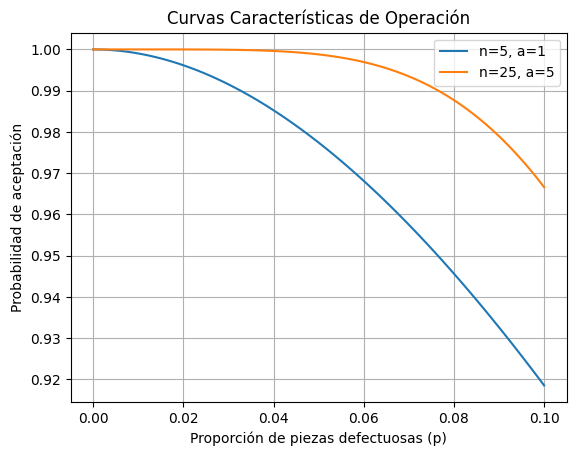

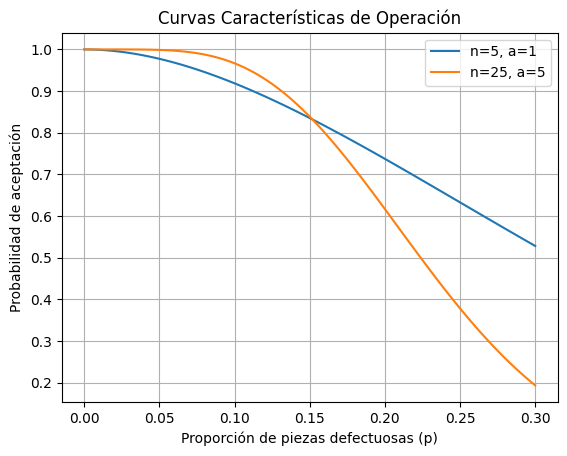

In [ ]:
graf_a = piezas_defectuosas(0.10)

graf_b = piezas_defectuosas(0.30)

**2.2.**

In [ ]:
import numpy as np
import scipy

def p(n,m=1,dt=1,t=1):

  Lambda = m *(t/dt)

  range(0,n)

  return(1-(scipy.stats.poisson.cdf(n,Lambda)))


In [ ]:
import scipy.stats

def p(n, m=1, dt=1, t=1):
    """
    Calcula la probabilidad de que una variable aleatoria Poisson sea mayor que n.

    Parámetros:
    - n (int): Número de ocurrencias.
    - m (float, opcional): Número de ocurrencias de referencias.
    - dt (float, opcional): Intervalo de tiempo en el que ocurre m.
    - t (float, opcional): Intervalo de tiempo donde ocurre n.

    Devuelve:
    float: Probabilidad de que la variable aleatoria sea mayor que n.
    """
    Lambda = m * (t / dt)

    # Genera una secuencia, pero no se está utilizando en el código original
    # Si se desea utilizar, puedes asignarla a una variable, por ejemplo: _ = range(0, n)

    return 1 - scipy.stats.poisson.cdf(n-1, Lambda)


**(a).**

In [ ]:
n = 0

while p(n,1,4,4) > 0.01:
  n=n+1
print(n,p(n,1,4,4))

4 0.00365984682734366


**(b).**

In [ ]:
h=0
P=1
n=0
m=1
dt=4
while P > 0.02:
  h=h+1/3600
  P=scipy.stats.poisson.cdf(n, float(m * (h / dt)))

print(int(h))

15


In [ ]:
def decdeg2dms(dd):
    mult = -1 if dd < 0 else 1
    mnt,sec = divmod(abs(dd)*3600, 60)
    deg,mnt = divmod(mnt, 60)
    return mult*deg, mult*mnt, mult*sec

H,M,S = decdeg2dms(h)
print(f"respuesta: {int(H)}h, {int(M)}m, {int(S)}s con probabilidad {round(P,2)}")

respuesta: 15h, 38m, 53s con probabilidad 0.02


**(c).**

In [ ]:
P_1 =scipy.stats.poisson.cdf(0, float(m * (4 / dt)))

P_2 = (p(1,m,dt,4))**2

posibles_resultados = 2**3

rta = (3)*(P_1)*(P_2)

print(rta)

0.44098782919824264


**(d).**

In [ ]:
import scipy.stats

def probabilidad_igual_desconexiones(n, m=1, dt=1, t=1):

    Lambda = m * (t / dt)
    k = int(3 * Lambda)

    return scipy.stats.poisson.pmf(k, Lambda)

In [ ]:
n = 3
m = 2

resultado = probabilidad_igual_desconexiones(n, m)
print(f"La probabilidad de que el número de desconexiones sea igual al número esperado es: {resultado:.4f}")

La probabilidad de que el número de desconexiones sea igual al número esperado es: 0.0120
